In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [9]:
df = pd.read_csv('RSCCASN.csv', parse_dates=True, index_col = 'DATE')

In [10]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [11]:
df.columns = ['sales']

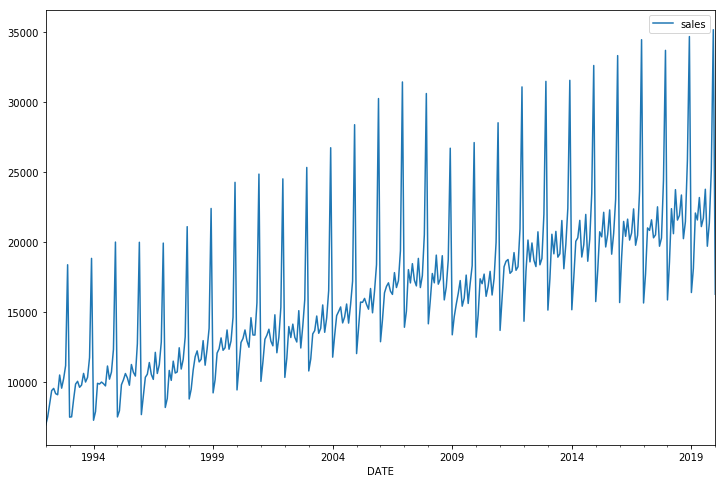

In [13]:
df.plot(figsize = [12, 8])

In [14]:
test_size = 18
test_index = len(df) - test_size

In [16]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [22]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train , length=length, batch_size=1)

In [24]:
n_features = 1

In [25]:
model = Sequential()

In [27]:
model.add(LSTM(100,activation='relu', input_shape=[length,n_features]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [30]:
validaion_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [32]:
model.fit_generator(generator, epochs=20, validation_data=validaion_generator, callbacks = [early_stop])

Epoch 1/20
307/307 [==============================] - 11s 35ms/step - loss: 0.0256 - val_loss: 0.0514
Epoch 2/20
307/307 [==============================] - 11s 34ms/step - loss: 0.0184 - val_loss: 0.0348
Epoch 3/20
307/307 [==============================] - 11s 37ms/step - loss: 0.0147 - val_loss: 0.0168
Epoch 4/20
307/307 [==============================] - 12s 38ms/step - loss: 0.0108 - val_loss: 0.0095
Epoch 5/20
307/307 [==============================] - 12s 38ms/step - loss: 0.0037 - val_loss: 0.0057
Epoch 6/20
307/307 [==============================] - 12s 38ms/step - loss: 0.0027 - val_loss: 0.0048
Epoch 7/20
307/307 [==============================] - 11s 37ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/20
307/307 [==============================] - 12s 38ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 9/20
307/307 [==============================] - 11s 37ms/step - loss: 0.0015 - val_loss: 0.0030


In [33]:
losses = pd.DataFrame(model.history.history)

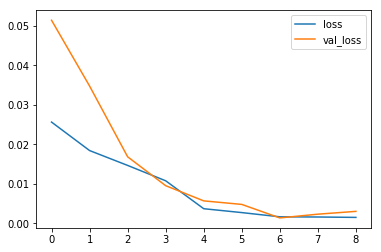

In [34]:
losses.plot()

In [35]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:],[[current_predict]] ,axis = 1)

In [36]:
true_predictions = scaler.inverse_transform(test_predictions)

In [37]:
test['predictions'] = true_predictions

/home/sinisha/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
test

,sales,predictions
DATE,,
2018-08-01,23381,21613.361630
2018-09-01,20260,19581.832676
2018-10-01,21473,20081.378722
2018-11-01,25831,23420.882781
2018-12-01,34706,30871.385499
2019-01-01,16410,16300.402251
2019-02-01,18134,18377.072773
2019-03-01,22093,21359.061070
2019-04-01,21597,20002.510677


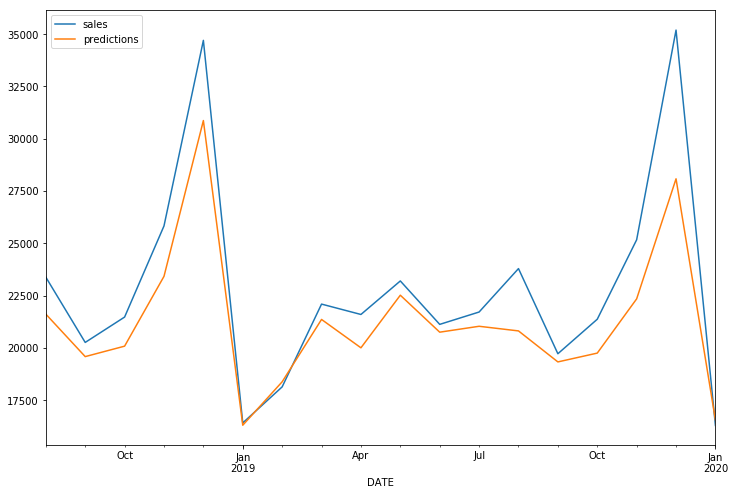

In [40]:
test.plot(figsize = (12,8))

In [41]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [43]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data, length=length, batch_size=1)

In [44]:
model = Sequential()
model.add(LSTM(50, input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [46]:
model.fit_generator(generator, epochs=20)

Epoch 1/20
325/325 [==============================] - 13s 40ms/step - loss: 0.0118
Epoch 2/20
325/325 [==============================] - 15s 45ms/step - loss: 0.0095
Epoch 3/20
325/325 [==============================] - 17s 54ms/step - loss: 0.0092
Epoch 4/20
325/325 [==============================] - 20s 61ms/step - loss: 0.0085
Epoch 5/20
325/325 [==============================] - 21s 63ms/step - loss: 0.0077
Epoch 6/20
325/325 [==============================] - 20s 61ms/step - loss: 0.0073
Epoch 7/20
325/325 [==============================] - 18s 56ms/step - loss: 0.0056
Epoch 8/20
325/325 [==============================] - 23s 72ms/step - loss: 0.0054
Epoch 9/20
325/325 [==============================] - 22s 69ms/step - loss: 0.0046
Epoch 10/20
325/325 [==============================] - 17s 51ms/step - loss: 0.0052
Epoch 11/20
325/325 [==============================] - 16s 50ms/step - loss: 0.0048
Epoch 12/20
325/325 [==============================] - 16s 48ms/step - loss: 0.0036
E

In [47]:
test_predictions = []
periods = 12
#first_eval_batch = scaled_train[-length:]
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:],[[current_predict]] ,axis = 1)

In [48]:
forecast_predictions = scaler.inverse_transform(test_predictions)

In [49]:
df

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-09-01,19719
2019-10-01,21369
2019-11-01,25169


In [50]:
forecast_predictions

array([[19043.34595346],
       [21135.82735157],
       [20946.22653055],
       [21557.33525801],
       [20388.00186491],
       [20667.77336049],
       [21327.64617729],
       [19226.38469839],
       [20424.08917904],
       [24313.167521  ],
       [31593.92803097],
       [17321.39693475]])

In [51]:
forecast_index = pd.date_range(start = '2020-02-01', periods= periods, freq="MS")

In [52]:
forecast_index

DatetimeIndex(['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [53]:
forecast = pd.DataFrame(data = forecast_predictions, index = forecast_index, columns=['forecast'])

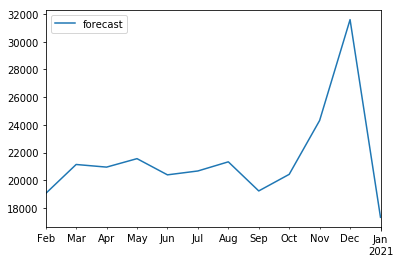

In [55]:
forecast.plot()

(588, 614)

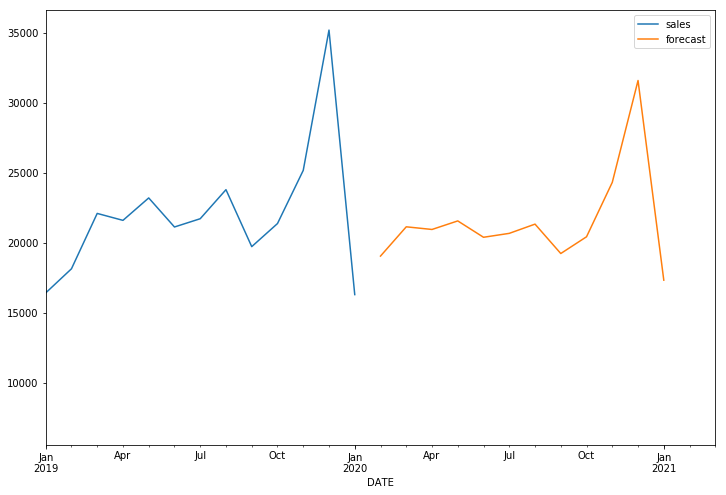

In [61]:
ax = df.plot(figsize=[12, 8])
forecast.plot(ax=ax)
plt.xlim('2019-01-01','2021-03-01')